In [2]:
import findspark
findspark.init("/u/cs451/packages/spark")

In [3]:
from pyspark.sql import SparkSession
import random
spark = SparkSession.builder.appName("YourTest").master("local[2]").config('spark.ui.port', random.randrange(4000,5000)).getOrCreate()

In [4]:
df = spark.read\
.option("wholeFile", True)\
.option("inferSchema", True)\
.option("header", True)\
.option("multiline", True)\
.option('quote', '"')\
.option('escape', '"')\
.csv("alldata.csv")
display(df)

DataFrame[position: string, company: string, description: string, reviews: int, location
: string]

In [5]:
df.printSchema()

root
 |-- position: string (nullable = true)
 |-- company: string (nullable = true)
 |-- description: string (nullable = true)
 |-- reviews: integer (nullable = true)
: string (nullable = true)



In [6]:
from pyspark.ml.feature import Tokenizer
from pyspark.ml import Pipeline

tokenizer = Tokenizer(inputCol="description", outputCol="words")

pipeline = Pipeline(stages=[tokenizer])

pipelineFit = pipeline.fit(df)
df = pipelineFit.transform(df)
#val_df = pipelineFit.transform(val_set)
#df.show(5)

In [ ]:
df.select('words').take(2)

In [ ]:
t1 = spark.sql("""select company, count from company1""")

t1.coalesce(1).write.option("delimiter",",").option("header", "true").\
        mode("overwrite").csv('company')

In [9]:
import matplotlib.pyplot as plt
import csv
import seaborn

/usr/lib/python3/dist-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0,0.5,'JOBS NUMBERS')

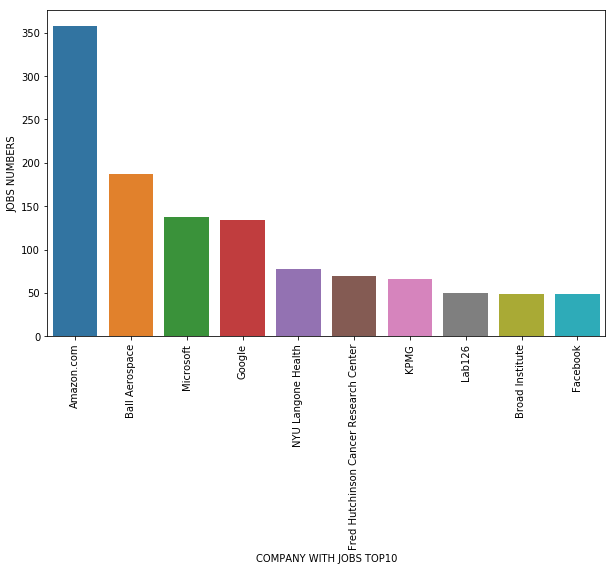

In [10]:
company_pd = df.select('company').groupby('company').count().orderBy('count', ascending=0).toPandas()
#company.createOrReplaceTempView("company1")
fig, ax = plt.subplots(figsize = (10,6))
           
ax=seaborn.barplot(x="company", y="count",data = company_pd[0:10]);    
ax.set_xticklabels(company_pd[0:10]["company"],rotation=90)  
ax.set_xlabel('COMPANY WITH JOBS TOP10',fontsize=10, color='black')
ax.set_ylabel('JOBS NUMBERS',fontsize=10,color='black') 

In [12]:
#location = df.groupby('location\r').count().orderBy("count", ascending = False)
#location.show(10)

#location.createOrReplaceTempView("location")


import pyspark.sql.functions as f

newDF = df.withColumn("city", f.split(df['location\r'], ', ')[0]).\
           withColumn("state", f.split(df['location\r'], ', ')[1])
            

newDF2  = newDF.withColumn("state2", newDF['state']).\
            withColumn("state", f.split(newDF['state'], ' ')[0])


Text(0,0.5,'JOBS NUMBERS')

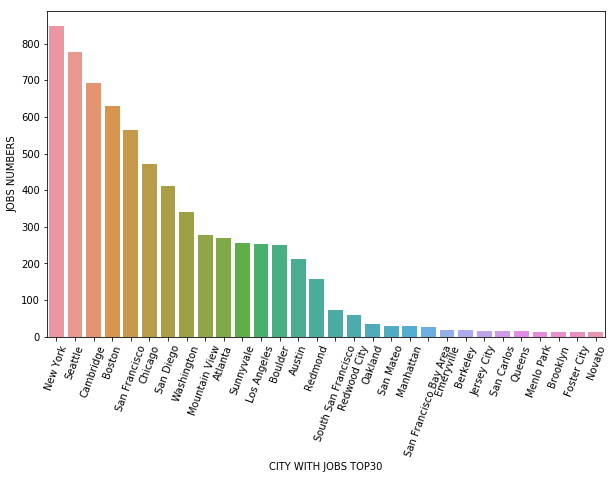

In [17]:
city_pd = newDF.select('city').groupby('city').count().orderBy('count', ascending=0).toPandas()
fig, ax = plt.subplots(figsize = (10,6))
           
ax=seaborn.barplot(x="city", y="count",data = city_pd[0:30]);    
ax.set_xticklabels(city_pd[0:30]["city"],rotation=70)  
ax.set_xlabel('CITY WITH JOBS TOP30',fontsize=10, color='black')
ax.set_ylabel('JOBS NUMBERS',fontsize=10,color='black') 

In [ ]:
state_pd = newDF2.select('state').groupby('state').count().orderBy('count', ascending=0).toPandas()
#company.createOrReplaceTempView("company1")
fig, ax = plt.subplots(figsize = (10,6))
           
ax=seaborn.barplot(x="state", y="count",data = state_pd[0:10]);    
ax.set_xticklabels(state_pd[0:10]["state"],rotation=90)  
ax.set_xlabel('STATE WITH JOBS TOP10',fontsize=10, color='black')
ax.set_ylabel('JOBS NUMBERS',fontsize=10,color='black') 

In [ ]:
state_pd = newDF2.select('state').groupby('state').count().orderBy('count', ascending=0).toPandas()
#company.createOrReplaceTempView("company1")
fig, ax = plt.subplots(figsize = (10,6))
           
ax=seaborn.barplot(x="state", y="count",data = state_pd[0:10]);    
ax.set_xticklabels(state_pd[0:10]["state"],rotation=90)  
ax.set_xlabel('STATE WITH JOBS TOP10',fontsize=10, color='black')
ax.set_ylabel('JOBS NUMBERS',fontsize=10,color='black') 

In [ ]:
newDF2.take(2)

In [ ]:
#location = df.groupby('location\r').count().orderBy("count", ascending = False)
#location.show(10)

#location.createOrReplaceTempView("location")


import pyspark.sql.functions as f

newDF = df.withColumn("city", f.split(df['location\r'], ', ')[0]).\
           withColumn("state", f.split(df['location\r'], ', ')[1])
            

newDF2  = newDF.withColumn("state2", newDF['state']).\
            withColumn("state", f.split(newDF['state'], ' ')[0])

In [ ]:
location = newDF2.groupby('city').count().orderBy("count", ascending = False)

In [ ]:
location.take(2)

In [ ]:
type(location)

In [ ]:
t1 = spark.sql("""select * from  """)

t1.coalesce(1).write.option("delimiter",",").option("header", "true").\
        mode("overwrite").csv('company1')

In [ ]:
newDF2.drop('location\r')

In [ ]:
newDF2.drop('state2')

In [ ]:
newDF2.show()

In [ ]:
split_col = location.withColumn("city", f.split(location['location\r'], ', ')[0]).\
           withColumn("state", f.split(location['location\r'], ', ')[1]) #.\
            #withColumn("postcode", f.split(location['location\r'], '" "')[1])

split_col2  = split_col.withColumn("postcode", f.split(split_col['state'], ' ')[1])


In [ ]:
df = df.withColumn('city', split_col.getItem(0))
df = df.withColumn('NAME2', split_col.getItem(1))

In [ ]:
newDF  = newDF.withColumn("postcode", f.split(newDF['state'], ' ')[0])
newDF.take(2)

In [ ]:
pandas_df_company = newDF.select("company").groupby("company").count().orderBy("count",ascending =0).toPandas()

Text(0,0.5,'JOBS NUMBERS')

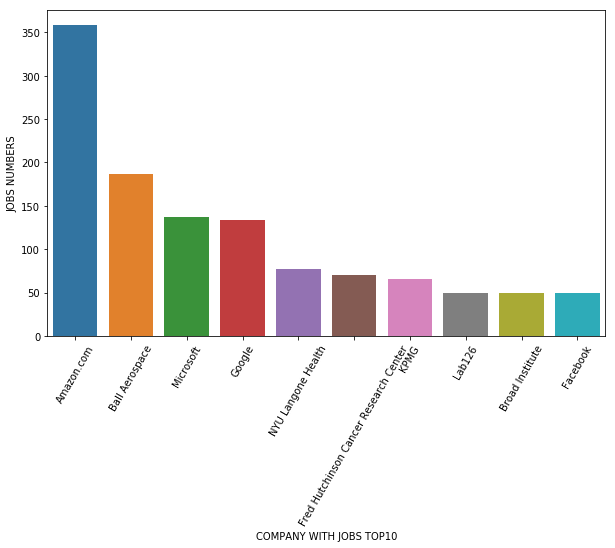

In [25]:
company_pd = newDF.select('company').groupby('company').count().orderBy('count', ascending=0).toPandas()
fig, ax = plt.subplots(figsize = (10,6))
           
ax=seaborn.barplot(x="company", y="count",data = company_pd[0:10]);    
ax.set_xticklabels(company_pd[0:10]["company"],rotation=60)  
ax.set_xlabel('COMPANY WITH JOBS TOP10',fontsize=10, color='black')
ax.set_ylabel('JOBS NUMBERS',fontsize=10,color='black') 